In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
edge_list=[[0,1], [0,2], [1,2], [2,3]]

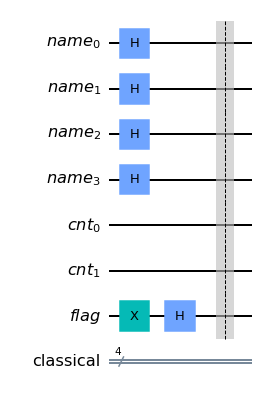

In [4]:
nodes = QuantumRegister(4, name="name")
edge_cnt = QuantumRegister(2, name="cnt")
out = QuantumRegister(1, name="flag")
cbits = ClassicalRegister(4, name="classical")
qc = QuantumCircuit(nodes, edge_cnt, out, cbits)

qc.h(nodes)
qc.x(out)
qc.h(out)

qc.barrier()

qc.draw(fold=-1)

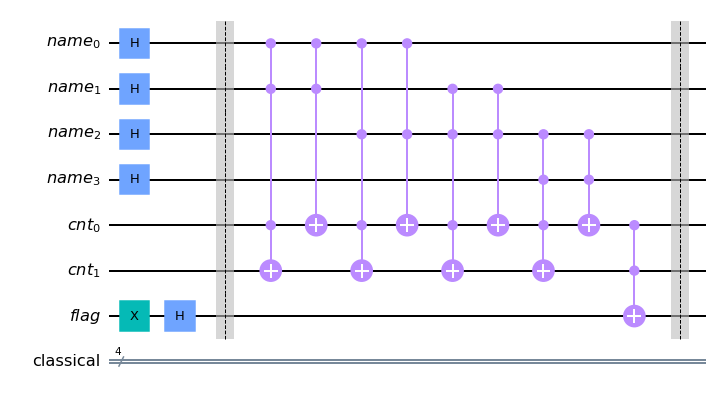

In [5]:
for i in edge_list:
    qc.mct([i[0], i[1], edge_cnt[0]], edge_cnt[1])
    qc.mct([i[0], i[1]], edge_cnt[0])
    
qc.mct([edge_cnt[0], edge_cnt[1]], out)
    
qc.barrier()

qc.draw(fold=-1)

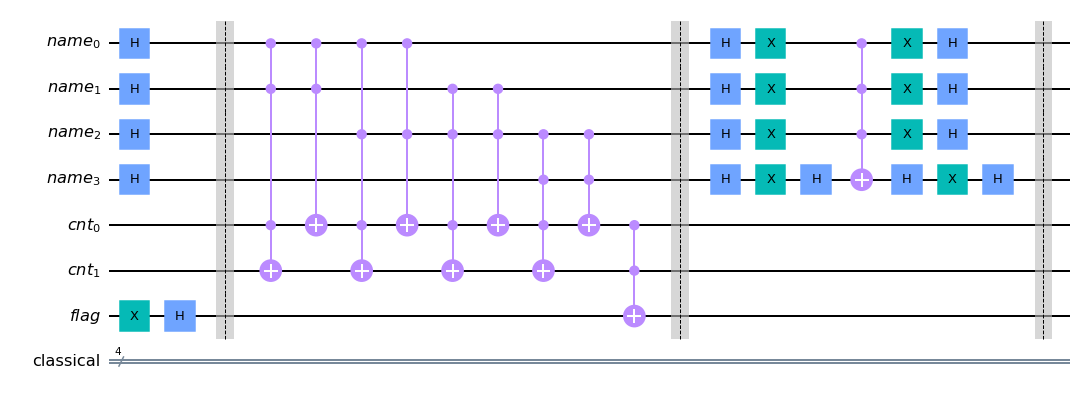

In [6]:
qc.h(nodes)
qc.x(nodes)
qc.h(nodes[3])
qc.mct(nodes[0:3], nodes[3])
qc.h(nodes[3])
qc.x(nodes)
qc.h(nodes)

qc.barrier()

qc.draw()

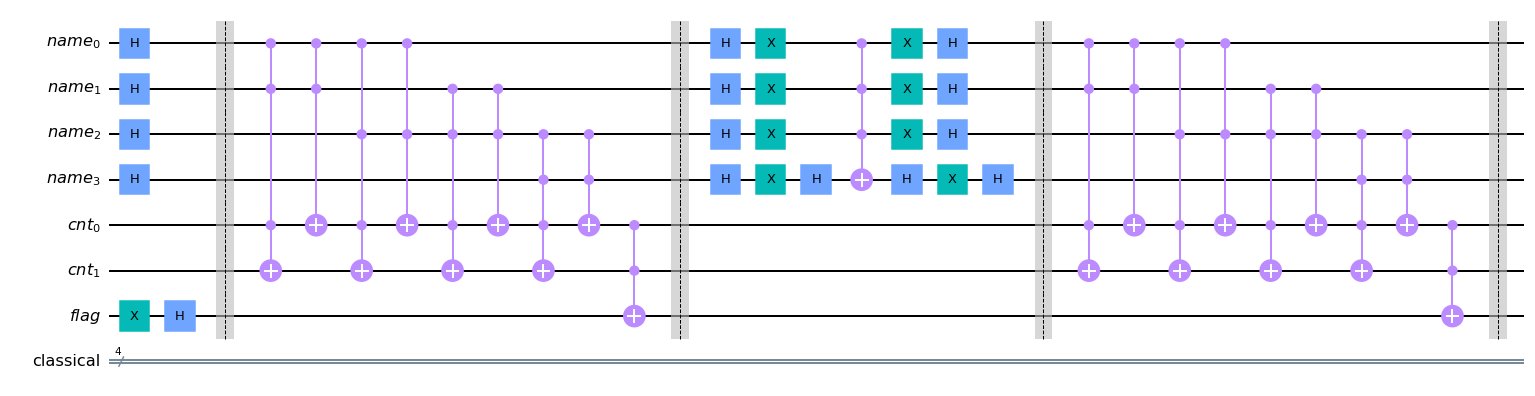

In [7]:
for i in edge_list:
    qc.mct([i[0], i[1], edge_cnt[0]], edge_cnt[1])
    qc.mct([i[0], i[1]], edge_cnt[0])
    
qc.mct([edge_cnt[0], edge_cnt[1]], out)
    
qc.barrier()

qc.draw(fold=-1)

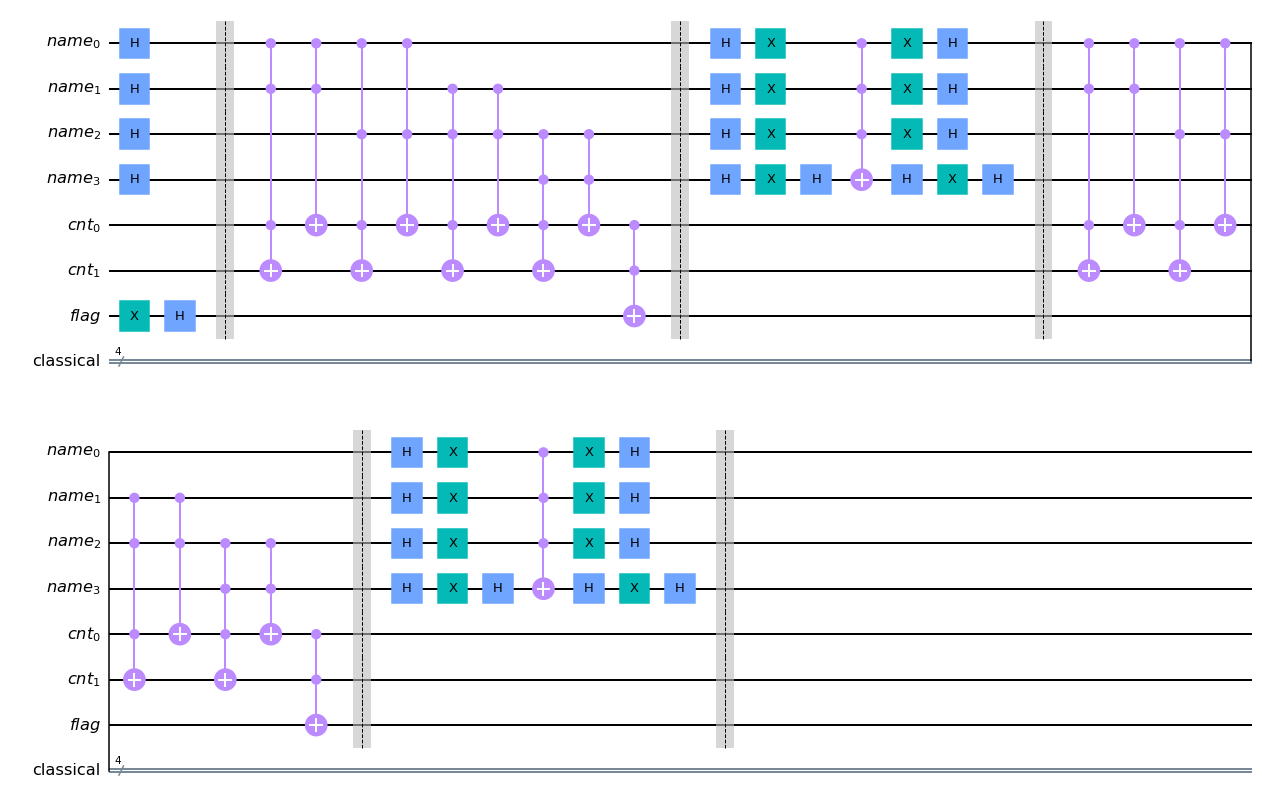

In [8]:
qc.h(nodes)
qc.x(nodes)
qc.h(nodes[3])
qc.mct(nodes[0:3], nodes[3])
qc.h(nodes[3])
qc.x(nodes)
qc.h(nodes)

qc.barrier()

qc.draw()

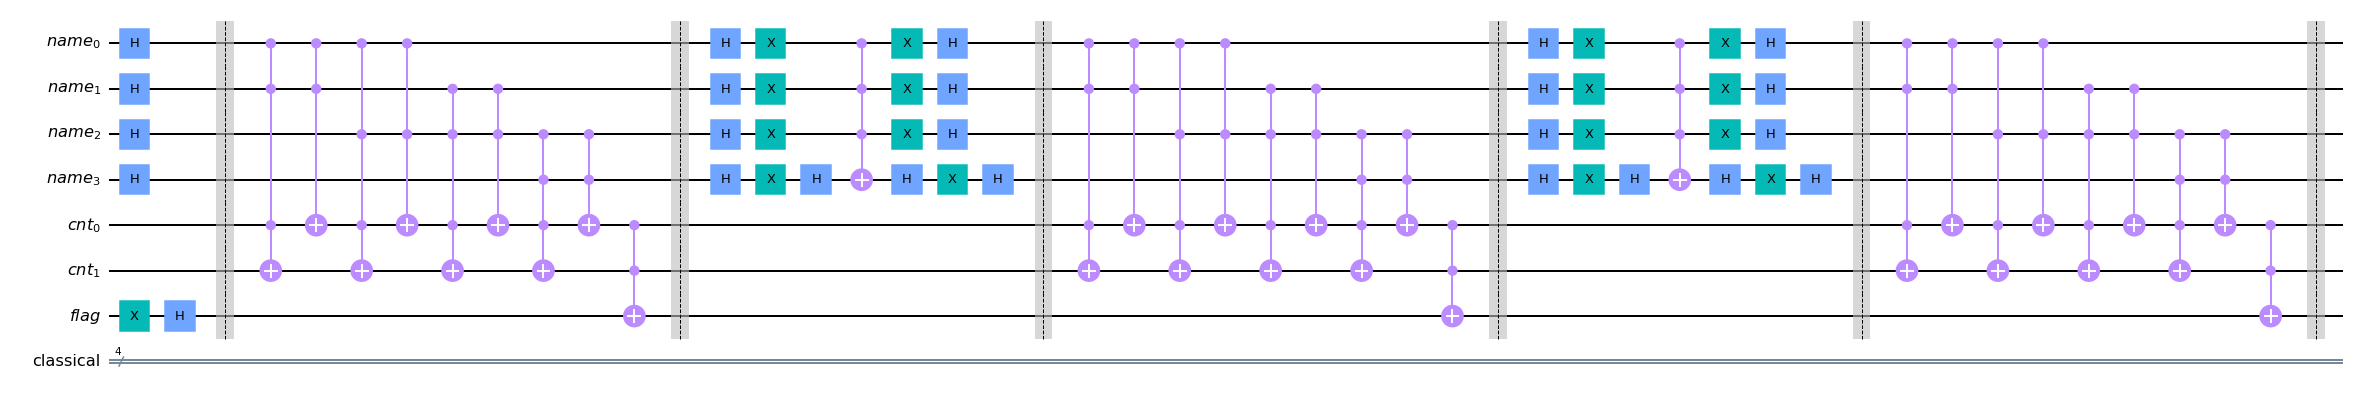

In [9]:
for i in edge_list:
    qc.mct([i[0], i[1], edge_cnt[0]], edge_cnt[1])
    qc.mct([i[0], i[1]], edge_cnt[0])
    
qc.mct([edge_cnt[0], edge_cnt[1]], out)
    
qc.barrier()

qc.draw(fold=-1)

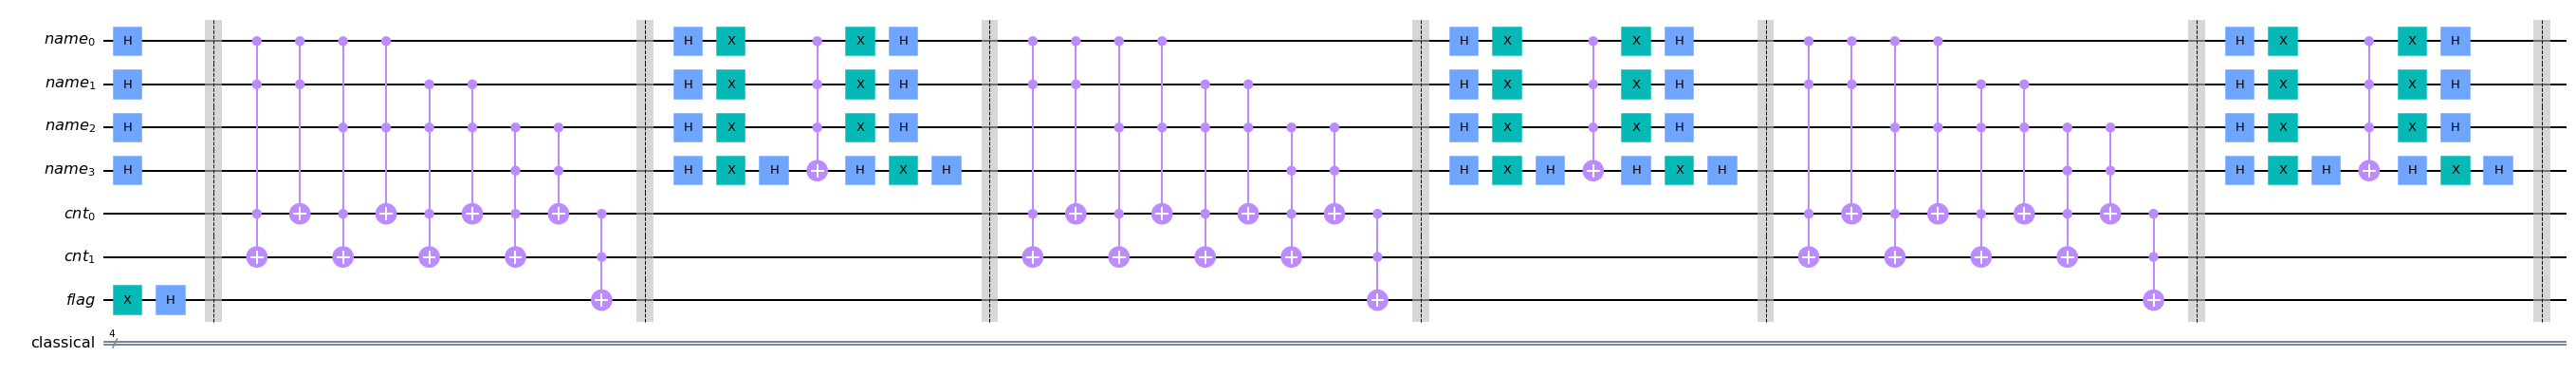

In [10]:
qc.h(nodes)
qc.x(nodes)
qc.h(nodes[3])
qc.mct(nodes[0:3], nodes[3])
qc.h(nodes[3])
qc.x(nodes)
qc.h(nodes)

qc.barrier()

qc.draw(fold=-1)

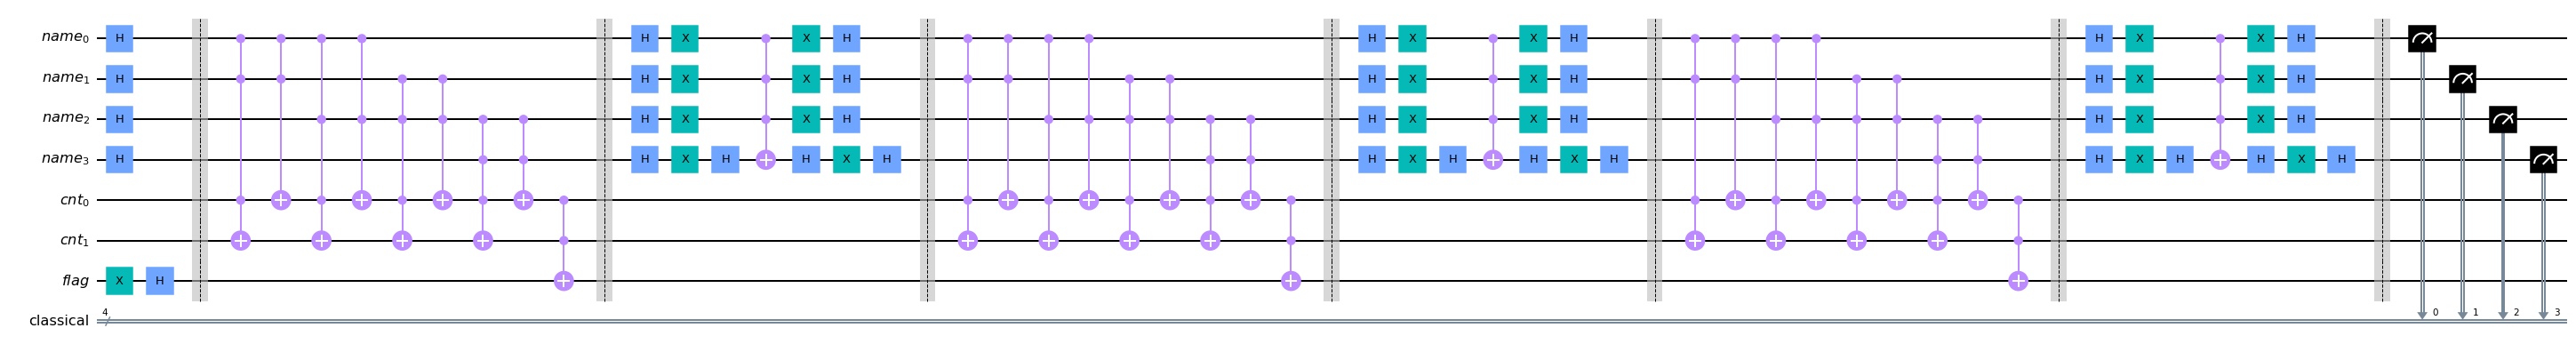

In [11]:
qc.measure(nodes, cbits)

qc.draw(fold=-1)

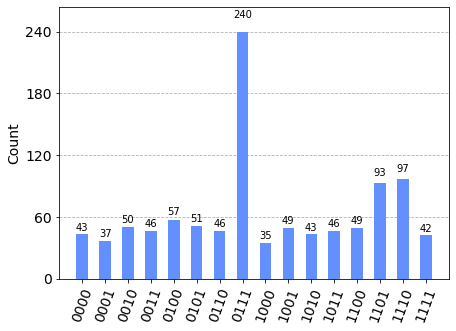

In [12]:
# Simulate and plot results
aer_simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_simulator)
qobj = assemble(transpiled_qc)
result = aer_simulator.run(qobj).result()
plot_histogram(result.get_counts())